# Modelling Complex Systems Final Project

# Housing Market Model

Author : Wassim Salama


# Introduction

Through this project, our main goal is to design a model that can be used to predict the price of real estates. Being able to predict a house price in a specific location can set the user a step ahead of the market. Using this model a user will be able to input year of build, square feet, number of rooms and washrooms. In return the model will output the best price.

When Looking into buying a new home, typically an overriding concern is: Am I paying too much? This question is often difficult to answer due to the fact that it's hard to keep track of all the houses available on the market.

A second, and related concern, is: Which house with similar specifications are available in a specific location? This information can help the buyer get a feel for what else is available on the market and provide an indication of the value of the estate currently under consideration.

The main objective of this model is to find the best price of an estate depending on specific factors such as number of bedrooms, bathrooms, house type and how many square-feet the house is. Such model can be used to compare prices of real estates in cities of Ontario. This model outputs accurate approximation on what the price range of a certain specification of a house would be.

Through this notebook we will explore and learn more about KNN Regression, simple linear regression, Multiple linear regression, Desicion tree and gradient boosting. 

Our team proposed to work on the stock market during project presentation but after analyzing the problem on a deeper level it seemed that the stock market is a very complicated system. We did not have enough knowledge under our belt to model such complicated system. Our team therefore decided to model the housing market instead as the market doesnt collaps overnight. Crashes materialize over month rather than just hours. This will help in presenting an accurate model that can be used to predict that takes a specific input and outputs useful information that can be used in a strategic manner by the user.

# Methodology

To model the housing market, we will build 4 different models that can predict the price of a house using specifications of real estate. To compare these models we will compare variance score and root mean square error. 

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

The model will take input such as price of estate, number od bedrooms and bathrooms, amount of square feet, and house type. The model will compare the input to collected data which will be extracted from kijij. Kijij allows user to search for real estates in various provinces in Canada, but for simplicity we will focus on the ontario region only.

The model will be presented by frist collecting data, perform data preprocessing and cleaning, followed by Exploratory data analysis & Visualisation, Data Modeling, and finally evaluting the model to ensure results are accurate. We will run the model and compare the results to ads on kijiji.

Code of experiment will be commented and explained making it easy for the reader to understand how the model work. 

# Design Modelling

To make Data collection possible the library BS4 was used to return the html tree of the webpage kijiji. This allowed data scraping.

For Data visialisation and Statistical analysis numpy, pylab and matplot libraries were used

pip install lxml should be installed first on the terminal

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Collection
-------------------------------------------------------------------------
Our first step in the design modelling process is collecting the data that will be used to run the model. Data will be collected from kijiji.  Kijiji provides about 2000-3000 real estates ads but to keep the model simple and fast, instead of analizying all 3000 ads we will analize a small fraction of that. This causes lower accuracy in results but keeps the model simple. We will scan the first 5 pages of the search requested. 

To increase accuracy, change the value highlighted in the code to capture more information and analizying more ads

The code below gets the ads URLS:

In [2]:
def get_ads_urls():
    
    urls_list = []
    # define the basic url to crawl on
    basic_url = "https://www.kijiji.ca/b-house-for-sale/ontario/c35l9004"
    
    # loop over the paginated urls
    
    #We prepared an output file that took an hour to process. use the output file attached with the project
    
    for i in range(100):     #To increase accuracy increase the range 
                            #Increasing range increase the wait time
                            #If you dont want to wait run the fist block in Preprocessing & Cleansing
        # get the page url
        url = basic_url+str(i)
        
        # get the request response
        r  = requests.get(url)
        data = r.text
        
        # transform it to bs object
        soup = BeautifulSoup(data, "lxml")
        
        # loop over page links 
        for div in soup.findAll('div', {'class': 'info-container'}):
            a = div.findAll('a')[0] 
            if (a.get('href')).find("/vip/") == -1:
                urls_list.append('https://www.kijiji.ca' + a.get('href'))

    
    df = pd.DataFrame(data={"url": urls_list})
    df.to_csv("ads_urls.csv", sep=',',index=False)

After we designed a function that collects the ads urls and save them into a file we run the function

In [3]:
get_ads_urls()

After data have been saved into a file, we scrape the data and organize the information in a way that will be useful for our model and convert that data to CSV file using the following functions: 


In [4]:
def scrapData(ad_url):
    r = requests.get(ad_url)
    data = r.text
    soup = BeautifulSoup(data, "html.parser")
    target_component = soup.findAll("span", itemprop="name")
    price = soup.findAll("span", {'class': 'currentPrice-441857624'})
    bedRoom = soup.findAll("dd", {'class': 'attributeValue-2574930263'})
    # create a list that will hold our component data
    results = []
    
    for i in target_component:
        results.append(''.join(i.findAll(text=True)).replace('\n',''))
    for i in bedRoom:
        results.append(''.join(i.findAll(text=True)).replace('\n',''))
    for i in price:
        results.append(''.join(i.findAll(text=True)).replace('\n',''))
    
    return results

In [5]:
def dataToCSV(data):
    with open("output.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(data)

The main purpose of the functions above is to read the saved urls file as a dataframe and create a list that will hold the final data. After list is created, we loop over the dataframe using a for loop. When data is ready, we send it to the dataToCSV function to write it in a csv file

In [6]:
# read the saved urls file as a dataframe 
urls_data = pd.read_csv("ads_urls.csv")

# create  a list that will hold the final data
final_result = []
i = 1

# loop over the dataframe
for index, row in urls_data.iterrows():
    final_result.append(scrapData(row['url']))

print('Scrapping data finished')

# now that we have all the data we can write it in a csv file
# dataToCSV(final_result)

Scrapping data finished


## Data Preprocessing & Cleansing 
-----------------------------------------------------------------------

After data is collected and organised, data has to be preprocessed and cleansed. We preprocess these dataset to make it useful for visualization.  

In [4]:
# set the column names
#Prov, City, Type, Sale/Rent, Type1, bedroom, bathroom, sqft, price
# Ontario,Toronto (GTA),Markham / York Region,Real Estate,For Sale,Condos for Sale in Markham / York Region,1 bedroom and den,1 bathroom,"$450,000.00"

colnames=['Province', 'City', 'Area', 'Type', 'Sale/Rent', 'Type1', 'Bedroom', 'Bathroom', 'SqFt','Price'] 

# read the csv file as a dataframe
df = pd.read_csv("output.csv", sep=",", names=colnames, header=None)

# let's get some simple vision on our dataset
df.head()

,Province,City,Area,Type,Sale/Rent,Type1,Bedroom,Bathroom,SqFt,Price
0,British Columbia,Comox Valley Area,Campbell River,Real Estate,For Sale,Houses for Sale in Campbell River,2 bedrooms,2 bathrooms,"1,500","$20,000.00"
1,Alberta,Edmonton Area,St. Albert,Real Estate,For Sale,Houses for Sale in Campbell River,6 bedrooms,6 bathrooms,"3,000","$1,200,000.00"
2,Alberta,Medicine Hat,Real Estate,Real Estate,For Sale,Houses for Sale in Campbell River,6 bedrooms,4 bathrooms,"4,200","$499,000.00"
3,Ontario,Toronto (GTA),City of Toronto,Real Estate,For Sale,Houses for Sale in Campbell River,5 bedrooms,4 bathrooms,"4,000","$749,000.00"
4,Ontario,Sudbury,Real Estate,Real Estate,For Sale,Houses for Sale in Campbell River,4 bedrooms,4 bathrooms,"3,965","$599,000.00"


The Table above summarizes the data before preprocessing. 

#### Starting the preprocessing process

The first step in preprocessing the data is getting rid of the unwanted strings from the table above. Unwanted columns such as type sale, area, type1 is not necessary for the user. Kijiji allows users to post an ad without the price. This confuses our model, therefore we will delete these ads from our dataset to maintain consistancy 

#### Reviewing unwanted columns

The code block below drops unwanted columns and cleans up the final data:

In [5]:
df = df.drop(columns=['Province', 'Area', 'Type', 'Sale/Rent', 'Type1'])
#df = df.dropna(subset = ['Price', 'Bedroom', 'Bathroom', 'SqFt'])

df['Bedroom'] = df['Bedroom'].str.replace('bedrooms', '')
df['Bedroom'] = df['Bedroom'].str.replace('bedroom', '')
df['Bedroom'] = df['Bedroom'].str.replace('and', '')
df['Bedroom'] = df['Bedroom'].str.replace('den', '')
df['Bedroom'] = df['Bedroom'].str.replace(' ', '')
df['Bathroom'] = df['Bathroom'].str.replace('bathrooms', '')
df['Bathroom'] = df['Bathroom'].str.replace('bathroom', '')


df['SqFt'] = df['SqFt'].str.replace(',', '')
df['SqFt'] = df['SqFt'].str.replace(' ', '')

df.Bedroom = pd.to_numeric(df.Bedroom, errors = 'coerce', downcast = 'integer')
df.Bathroom = pd.to_numeric(df.Bathroom, errors = 'coerce', downcast = 'integer')
df.SqFt = pd.to_numeric(df.SqFt, errors = 'coerce', downcast = 'integer')
#df = df.dropna(subset = ['SqFt'])

#### Reviewing the price columns

The code block below processes the price data:

In [6]:
df.Price = df.Price.str.replace(',','')
df.Price = df.Price.str.replace(' ','')
df.Price = df.Price.str.replace('$','')
df.Price = pd.to_numeric(df.Price, errors = 'coerce', downcast = 'integer')
df.head()

,City,Bedroom,Bathroom,SqFt,Price
0,Comox Valley Area,2,2.0,1500,20000
1,Edmonton Area,6,6.0,3000,1200000
2,Medicine Hat,6,4.0,4200,499000
3,Toronto (GTA),5,4.0,4000,749000
4,Sudbury,4,4.0,3965,599000


#### Filling in NaN values so calculations can be performed with a good amount of scraped data

In [7]:
df.fillna(df.mean(), inplace=True)

After Data is processed and cleaned is is ready for display. The table below describes the processed data

In [8]:
df.head()

,City,Bedroom,Bathroom,SqFt,Price
0,Comox Valley Area,2,2.0,1500,20000
1,Edmonton Area,6,6.0,3000,1200000
2,Medicine Hat,6,4.0,4200,499000
3,Toronto (GTA),5,4.0,4000,749000
4,Sudbury,4,4.0,3965,599000


This summarizes the data preprossessing and cleansing process

## Exploratory data analysis & Visualisation (still needs to be changed)
-------------------------------------------------------------------------

#### Price Distrubution by square feet

Let's visualize the distribution of estate price by their size, and look how it behaves

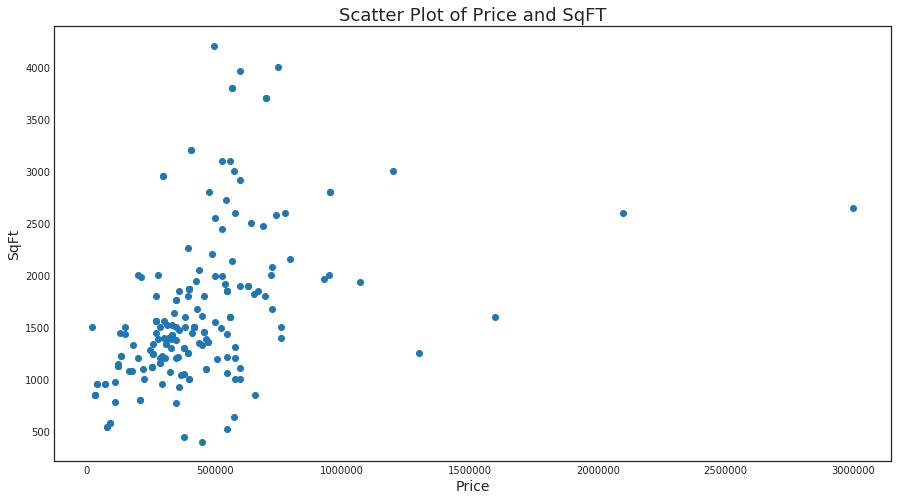

In [9]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.Price, df.SqFt)
plt.xlabel("Price", fontsize=14)
plt.ylabel("SqFt", fontsize=14)
plt.title("Scatter Plot of Price and SqFT",fontsize=18)
plt.show()

#### Interpretation of plots 

As we can see from the plot above, the estate price increase respectivly as size of estate increases, and more explicitly we can say that the more the rooms and bathrooms in a house, the price augment, while in the other side a small estate still has a low price, and this is totally logical since whenever size of house increase their price starts to increase.

#### Price Distrubution by Bedroom number

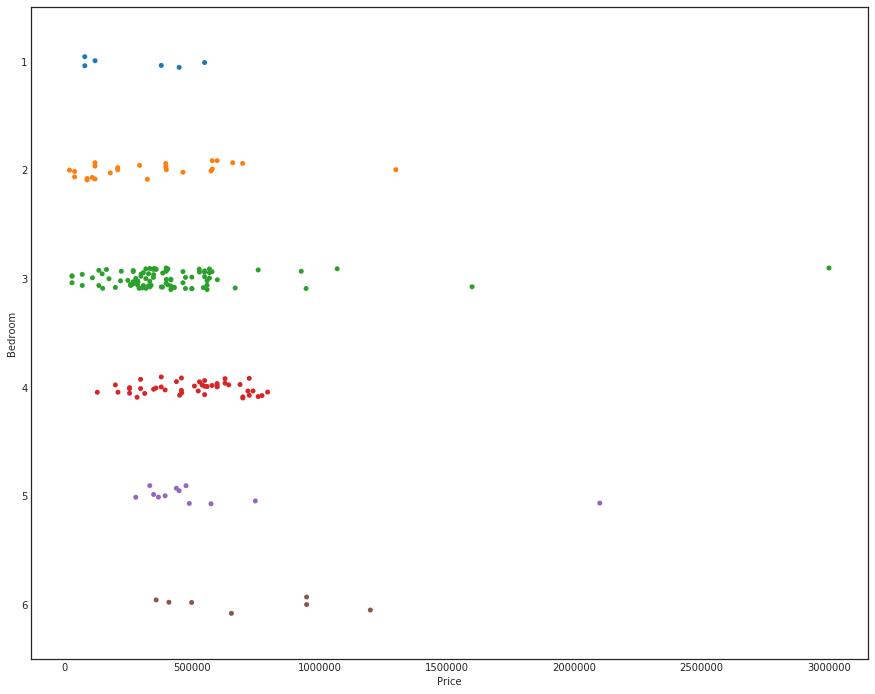

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='Price', y='Bedroom', jitter=.1, orient='h')
plt.show()

#### Price Distrubution by number of bathrooms

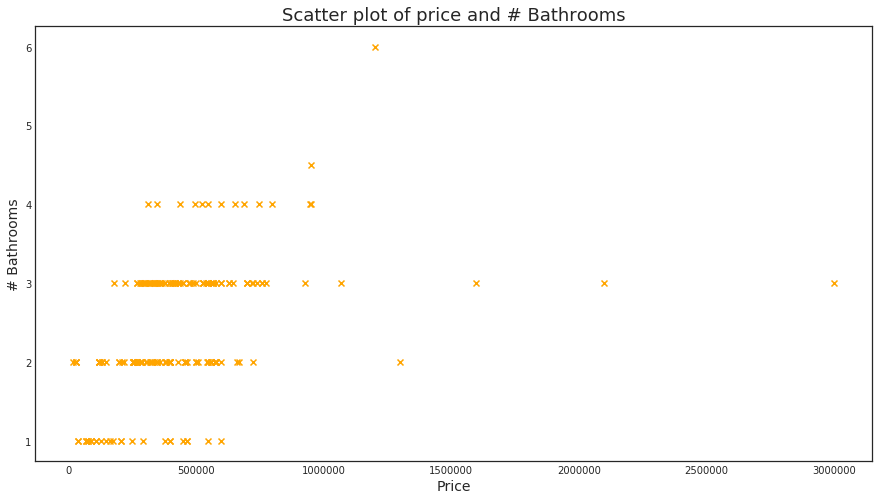

In [11]:
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.Price, df.Bathroom, c='orange', marker='x')
plt.xlabel("Price", fontsize=14)
plt.ylabel("# Bathrooms", fontsize=14)
plt.title("Scatter plot of price and # Bathrooms",fontsize=18)
plt.show()

#### Interpretation of plots 

By analizing at the table above we see that the price of a real estate increases as bedroom number increase. as the number of bathrooms increase the price also increase which seems pretty accurate 

#### Top five house types

In [12]:
print('The number of unique cities are: ',len(df.City.unique()))

The number of unique cities are:  43


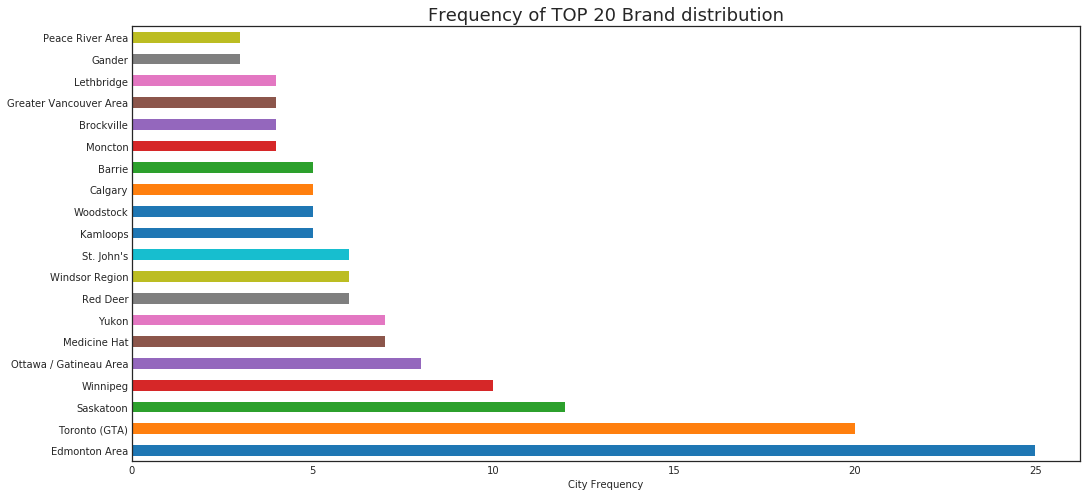

In [13]:
plt.figure(figsize=(17,8))
df.City.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 Brand distribution",fontsize=18)
plt.show()

#### Price Distrubution by number of bedroom and bathroom

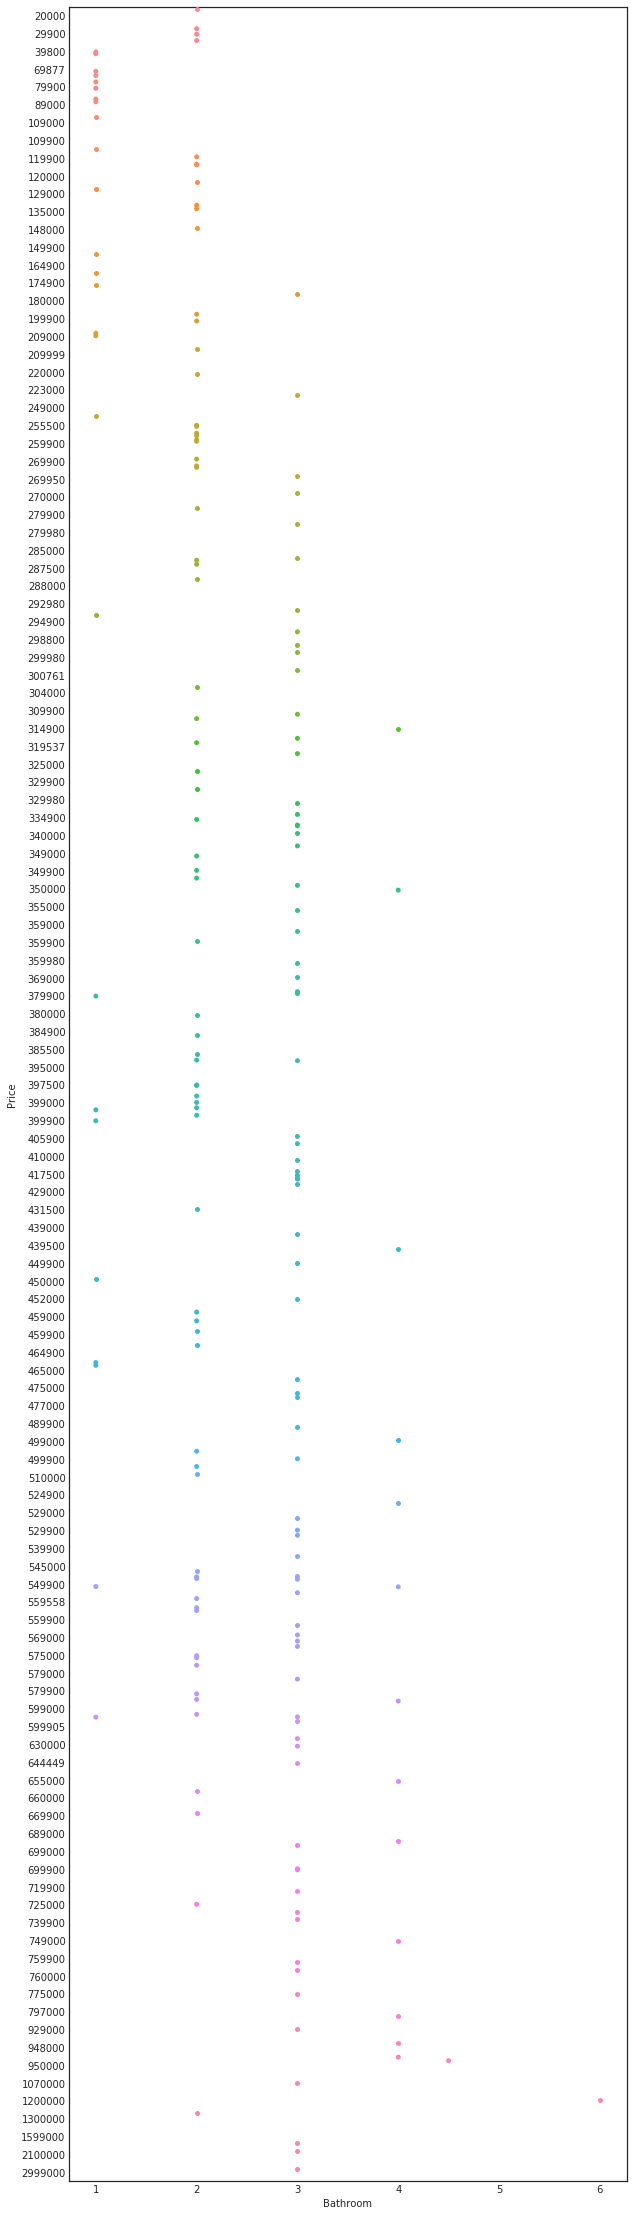

In [14]:
f, ax = plt.subplots(figsize=(10, 40))
sns.stripplot(data = df, x='Bathroom', y='Price', jitter=.5, orient='h')
plt.show()

The table above shows that as bathroom number increase the price of a property increase. The lowest price of a 2 bedroom property is approximately 21,000 compared to 1,200,000 of a 6 bedroom property.

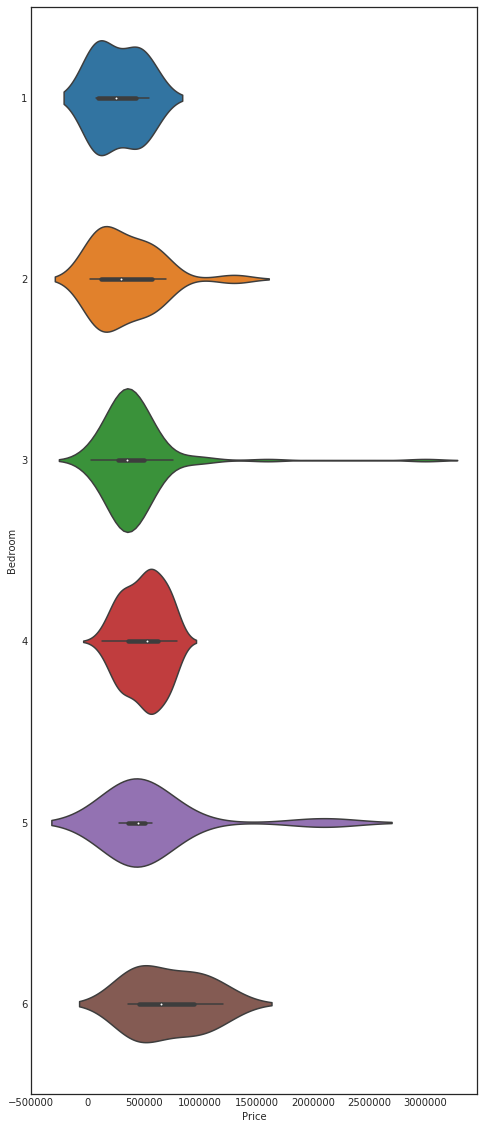

In [15]:
f, ax = plt.subplots(figsize=(8,20))
sns.violinplot(data = df, x='Price', y='Bedroom', orient='h')

plt.show()

The figure above is a Violin plot. The violin plot  shows the full distribution of the data (Price vs Num of bedrooms). 

#### Correlation Matrix 

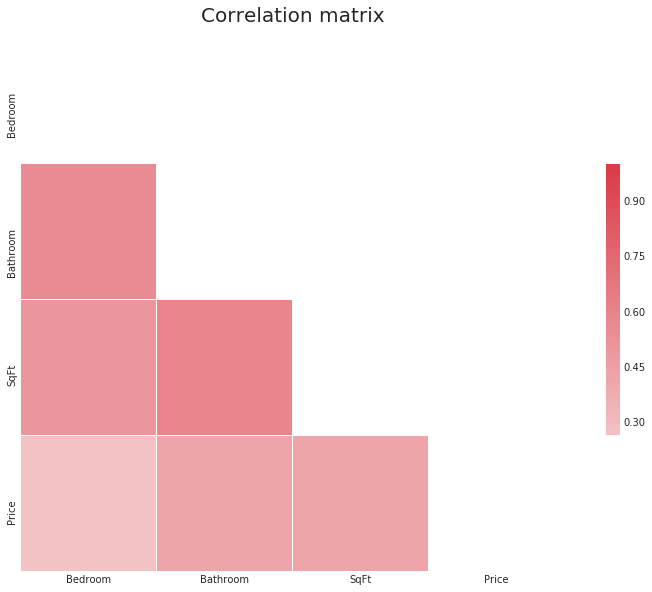

In [16]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

The correlation matrix shows that there is a strong relationship between Sqft and bathroom. This seems accurate because in bigger homes we ussually have more bathrooms. SqFt and price is an another strong correlation. bigger property means larger  sqFT value. The correlation matrix can be used to prove that the chosen variables are a good choice or not. Using the correlation matrix, we see that our variables correlate to each other. This helps in building a stronger and a more accurate model.

#### Ads distribution by cities

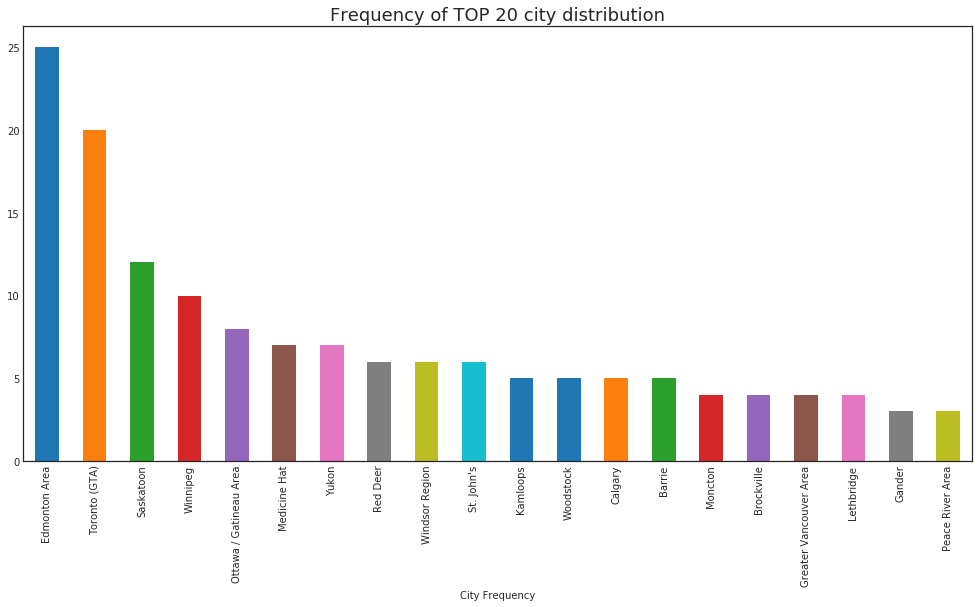

In [17]:
plt.figure(figsize=(17,8))
df.City.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 city distribution",fontsize=18)
plt.show()

We can clearly visualize that most of ad publications are coming from Edminton & Toront. Having Toronto on the top 20 distribution is quite normal due to the geographic distribution of the population. It seems like the model collected multiple duplicates in edminton. This would change every time you run the model. To solve this problem, a function should be programmed to delete duplicates


furthermore such graph can describe the economic position of those cities in Canada beyond the other ones

This summarizes the Design modelling section

# Data Modelling

## KNN Regression
-------------------------------------------------------------------------

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 

A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors. 

In [18]:
## create a dataframefor testing
data = df[df.Price < 400000]

In [19]:
data.head()

,City,Bedroom,Bathroom,SqFt,Price
0,Comox Valley Area,2,2.0,1500,20000
14,Moncton,4,3.0,2950,298800
15,Moncton,4,3.0,2950,298800
30,Greater Vancouver Area,4,3.0,2259,395000
36,Moncton,4,2.0,2000,199900


In [20]:
print(len(data))
print(len(df))

99
188


#### Dealing with categorical Features

At the moment we still have 1 categorical features which is city column. The main objective of the code below is to pre process this feature in order to make them numerical so that they will fit into our model.<br/>
In literature there is two famous kind of categorical variable transformation, the first one is <b>label encoding</b>, and the second one is the <b>one hot encoding</b>, for this use case we will use the one hot position  and the reason we will choose this kind of data labeling is because we will not need any kind of data normalisation later, and also This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [21]:
X = data[['SqFt', 'Bathroom', 'Bedroom', 'City']]
Y = data.Price
X = pd.get_dummies(data=X)

In [22]:
X.head()

,SqFt,Bathroom,Bedroom,City_Brandon Area,City_Bridgewater,City_Brockville,City_Calgary,City_Cape Breton,City_Comox Valley Area,City_Edmonton Area,...,City_Owen Sound,City_Peace River Area,City_Red Deer,City_Regina Area,City_Saskatoon,City_Sudbury,City_Timmins,City_Toronto (GTA),City_Windsor Region,City_Winnipeg
0,1500,2.0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,2950,3.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2950,3.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,2259,3.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2000,2.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Splitting

Usually we split our data into three parts : Training , validation and Testing set, but for simplicity we will use only train and test with 20% in test size.

now we use the train_test_split function already available in sklearn library to split our data set

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

The value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value.


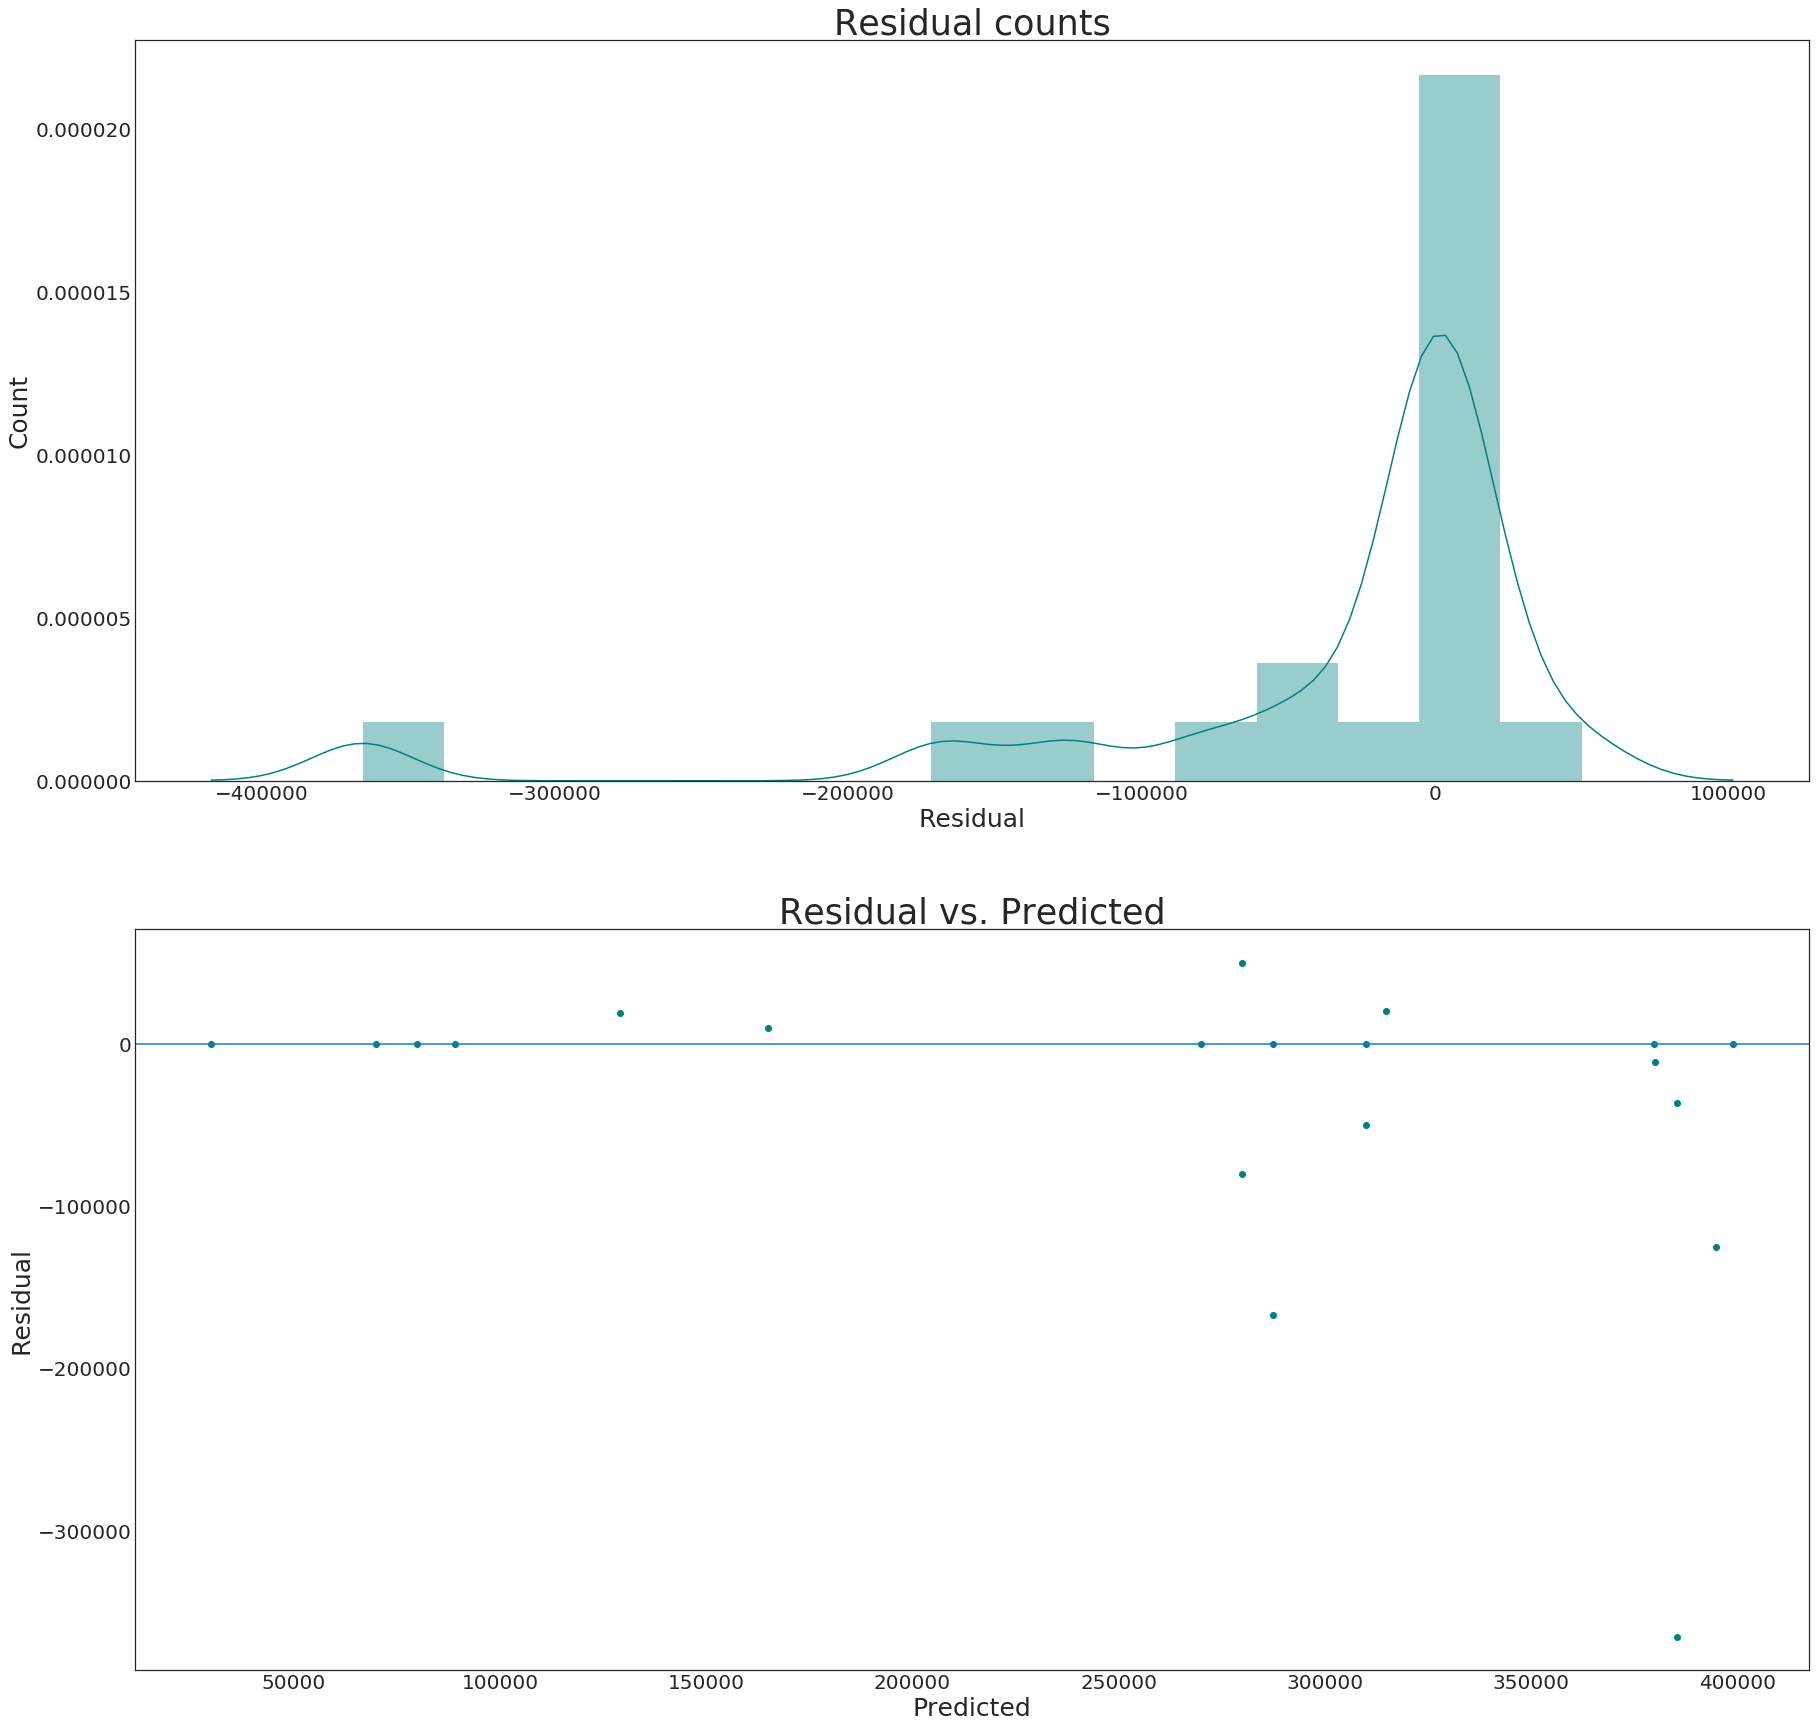

RMSE:
97720.4558933287


In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [25]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.35


As we can see we got 35% in the r^2 score by using n_neighbors = 1, we still don't know if it's the optimal number of neighors or not, so for that we will plot a histogram of different Root Mean Squared Error by n_neighbors and see who's have the lowest RMSE value, and another thing is that the mean of cross validation values is very low which may indicate that our model had overfitted.

In [26]:
rmse_l = []
num = []
for n in range(1, 2):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

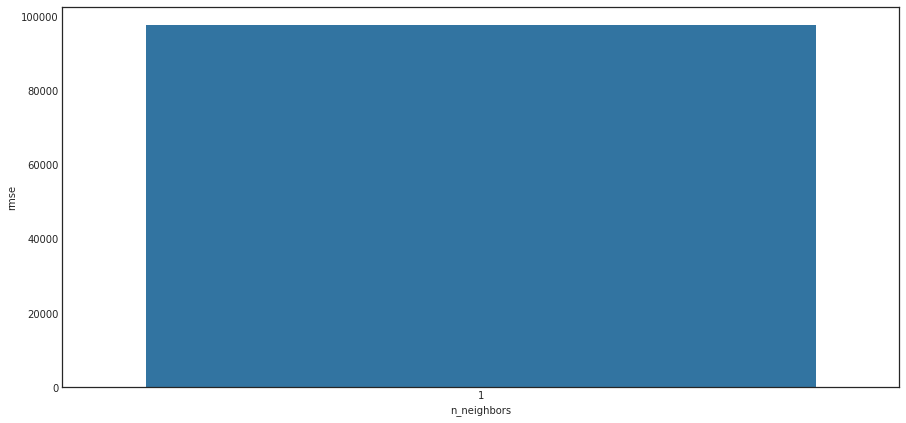

In [27]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

It appears that 1 nearest neighbor is the optimal number of neighbors.

## Desicion Tree Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.

The standard deviation reduction is based on the decrease in standard deviation after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest standard deviation reduction (i.e., the most homogeneous branches).

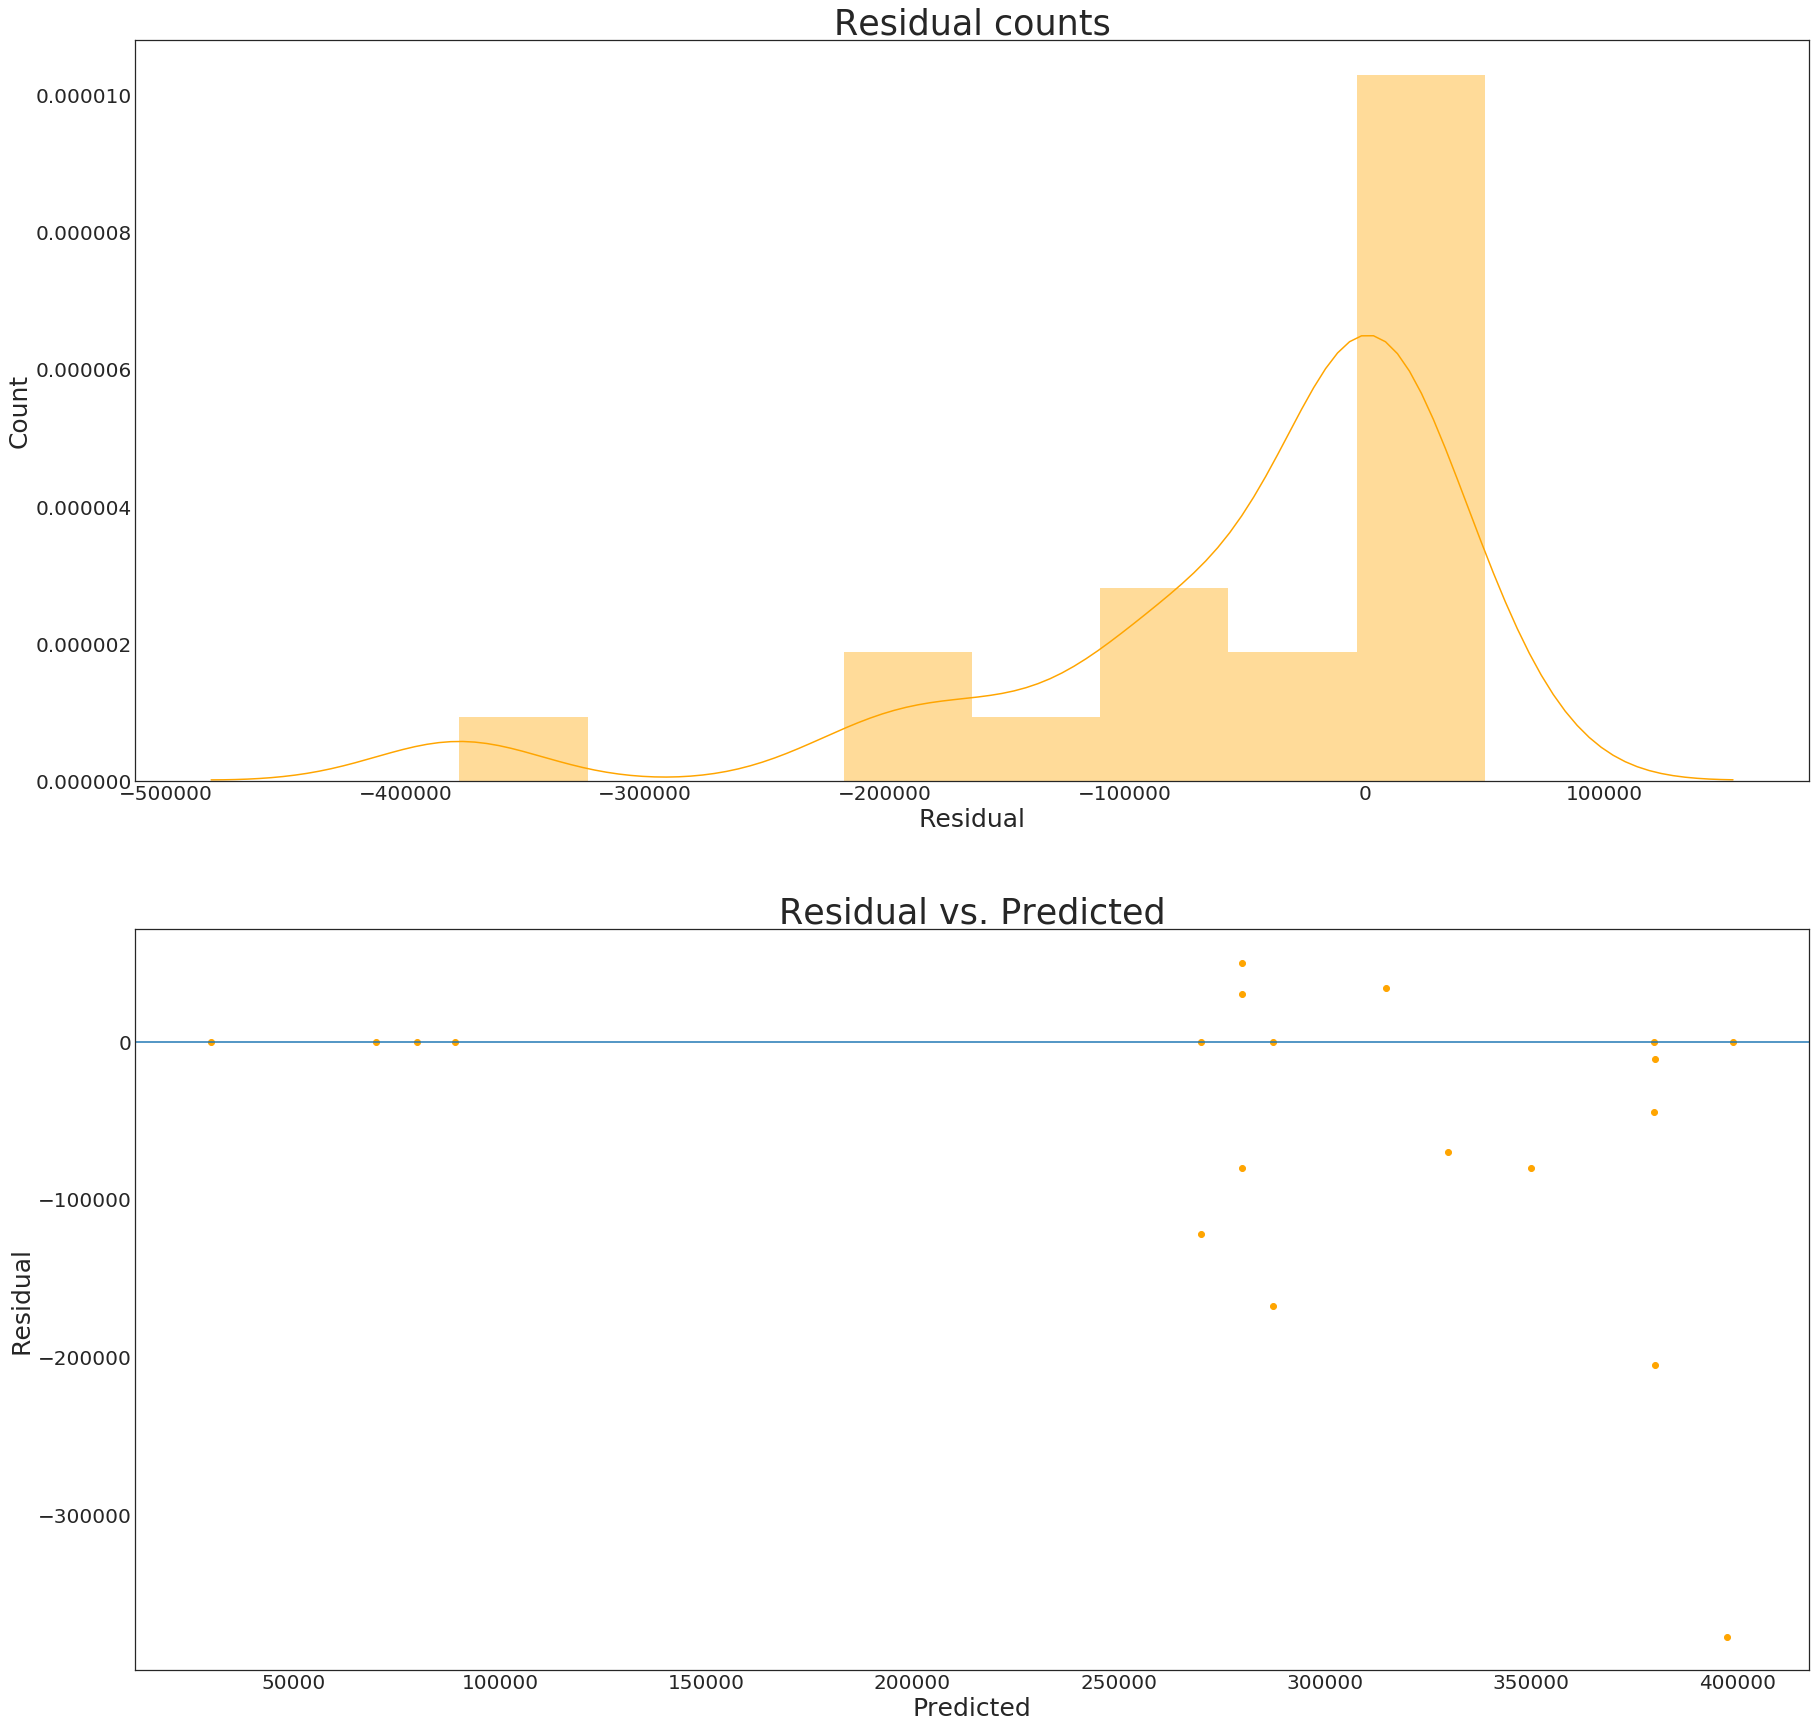

RMSE:
112228.41193298603
Variance score: 0.14


In [28]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))

## Linear Regression
-------------------------------------------------------------------------

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

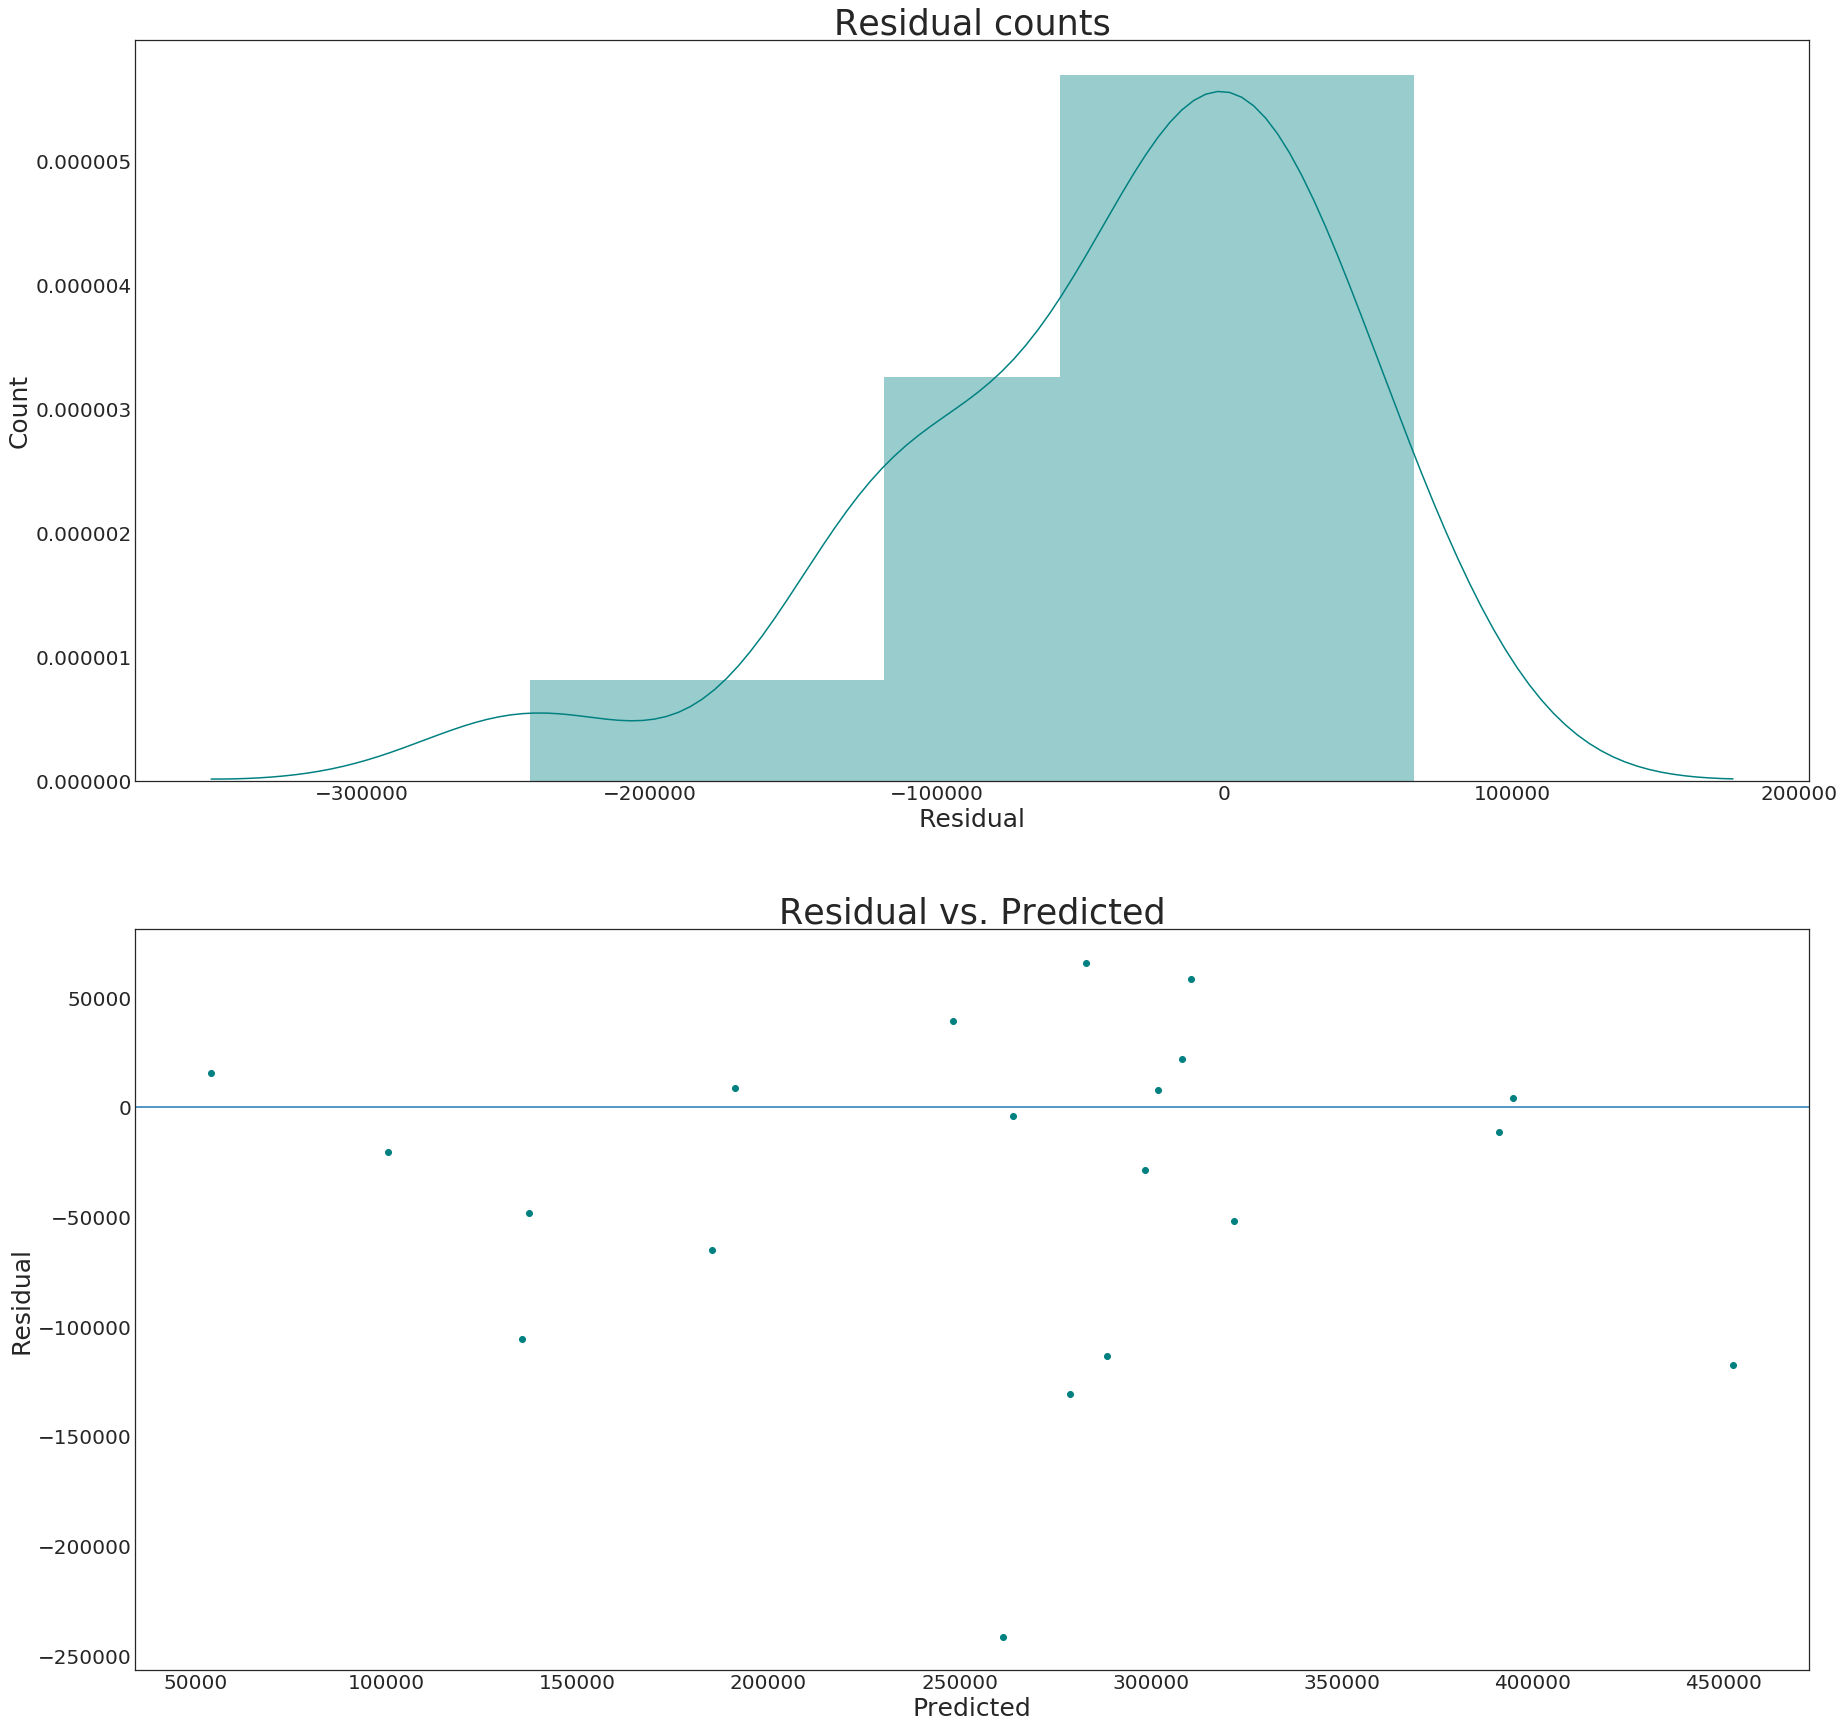

RMSE:
81887.78788332528


In [29]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [30]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.54


## Boosting
-------------------------------------------------------------------------

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms which convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier which is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification. ~ WikiPedia) 
Let's see if boosting can improve our scores.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=2).mean())

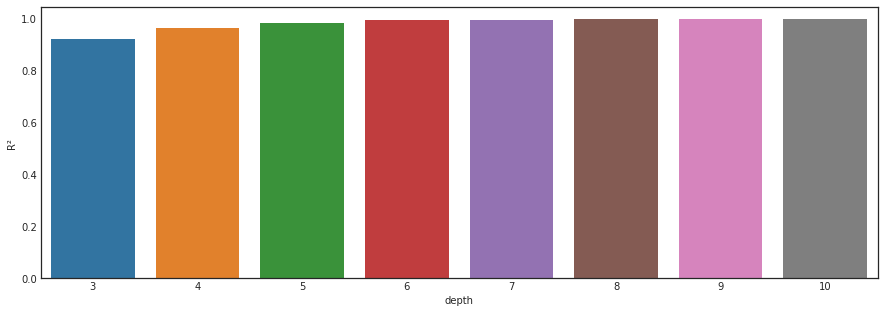

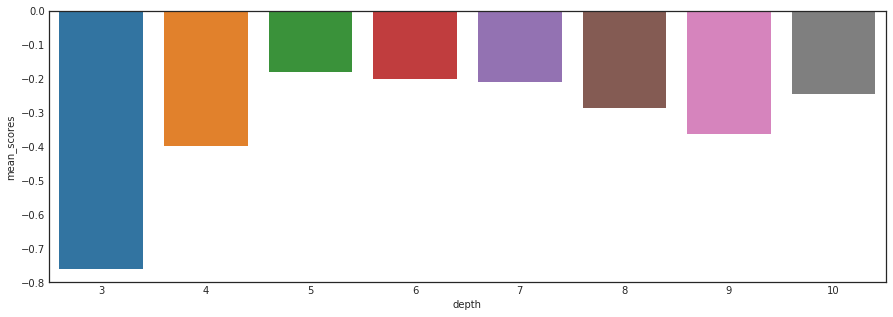

In [32]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

In [33]:
X_test

,SqFt,Bathroom,Bedroom,City_Brandon Area,City_Bridgewater,City_Brockville,City_Calgary,City_Cape Breton,City_Comox Valley Area,City_Edmonton Area,...,City_Owen Sound,City_Peace River Area,City_Red Deer,City_Regina Area,City_Saskatoon,City_Sudbury,City_Timmins,City_Toronto (GTA),City_Windsor Region,City_Winnipeg
141,1161,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,1383,3.0,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182,577,1.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
75,1560,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,540,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,950,1.0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
143,1150,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115,1342,3.0,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53,1863,2.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1500,2.0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


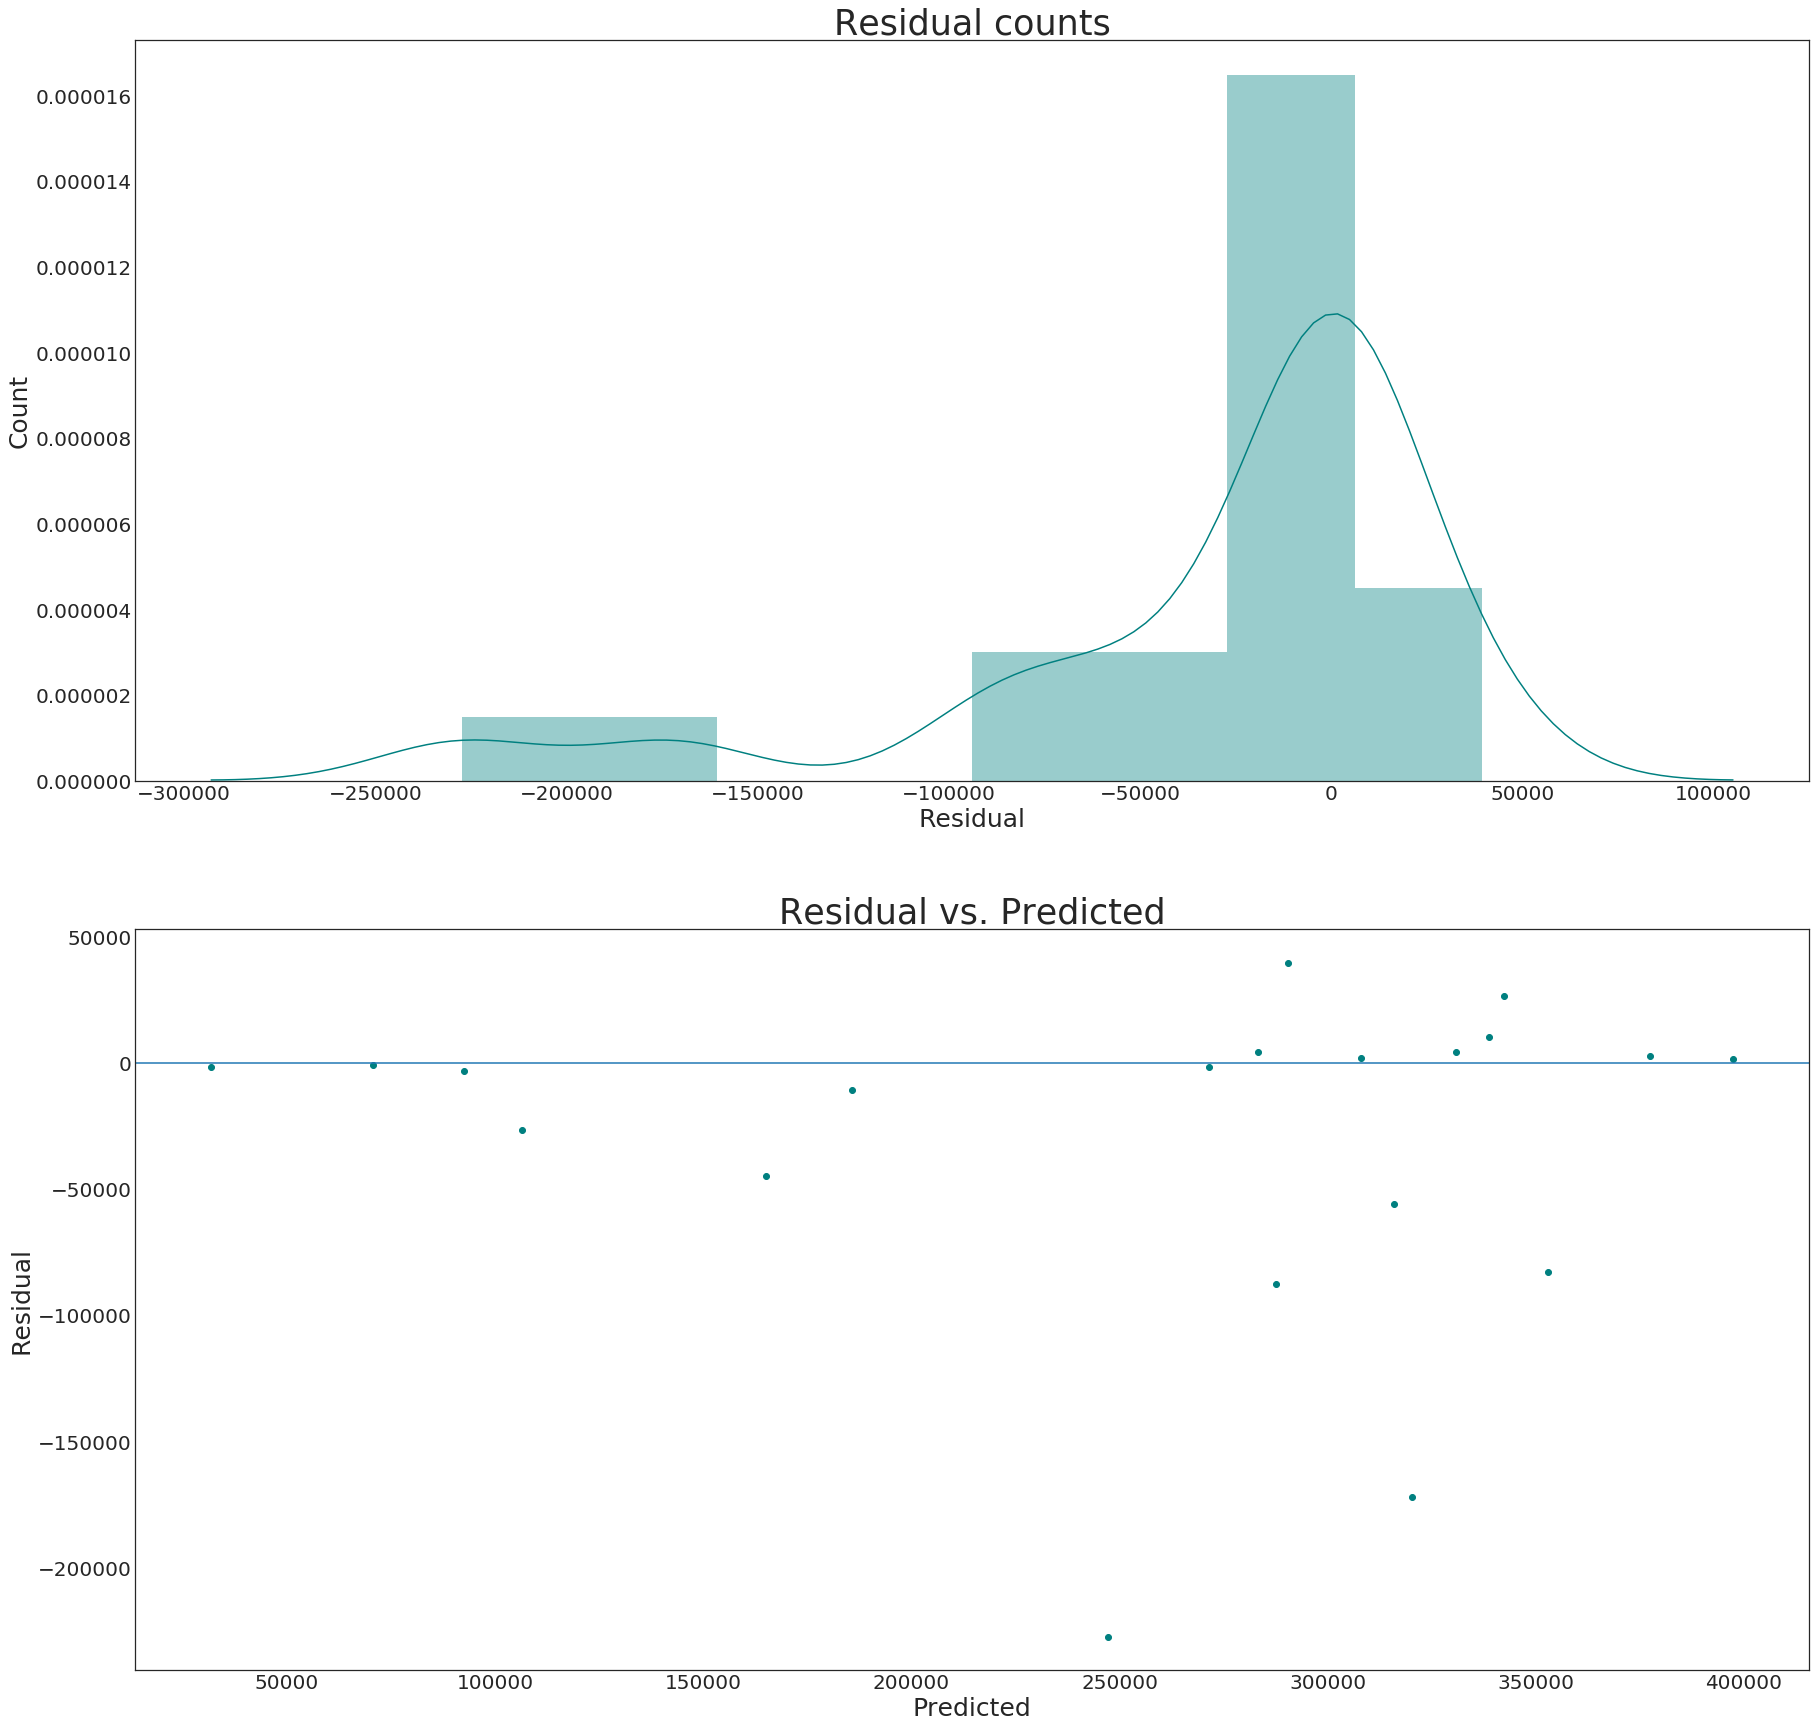


Cross Validation Scores:
[-0.16734171 -0.16446258]

Mean Score:
-0.16590214428494432

RMSE:
72238.27359953547


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=2)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [35]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.64


This concludes the Data Modelling Section

Variance score and RMSD values keep changing every time we run a search. To discuss our results we will use the following values

# Discussion

Variance score and RMSD values keep changing every time we run a search. To discuss our results we will use the following values obtained from the first successful run. 

<table class="table table-bordered">
    <thead>
      <tr>
        <th>Model</th>
        <th>Variance Score</th>
        <th>RMSE</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>KNN</td>
        <td>0.56</td>
        <td>37709.67</td>
      </tr>
      <tr>
        <td>Multiple Linear Regression</td>
        <td>0.62</td>
        <td>34865.07</td>
      </tr>
      <tr style="color: green">
        <td>Gradient Boosting</td>
        <td>0.80</td>
        <td>25176.16</td>
      </tr>
      <tr>
        <td><b>Decision Tree</b></td>
        <td><b>0.63</b></td>
        <td><b>34551.17</b></td>
      </tr>
    </tbody>
</table>

The root-mean-square deviation (RMSD) or root-mean-square
error (RMSE) (or sometimes root-mean-squared error) is a
frequently used measure of the differences between values
(sample and population values) predicted by a model or an
estimator and the values actually observed. The RMSD represents
the sample standard deviation of the differences between
predicted values and observed values. These individual
differences are called residuals when the calculations are
performed over the data sample that was used for estimation and
are called prediction errors when computed out-of-sample. The
RMSD serves to aggregate the magnitudes of the errors in
predictions for various times into a single measure of predictive
power. RMSD is a measure of accuracy, to compare forecasting
errors of different models for a particular data and not between
datasets, as it is scale-dependent. By comparing the Gradient
Boosting Model with the KNN Regression we can see that the
RMSE was reduced from 37709 to 25176.16 and a variance
increase from 0.56 to 0.80.

By looking at the RMSE score we've vast improvements, as you can see from the "Residual vs. Predicted" that the predicted score is closer to zero and is tighter around the lines which means that we are guessing alot closer to the price.

#### Model Evaluation

It appears that the Gradient Boosting model regressor win the battle with the lowest RMSE value and the highest R^2 score. In the following table we will do a benchmarking resuming all the models tested above.

Since the Gradient Boosting regressor is the winner, we will now inspect its coeficients and interceptors.

#### Prediction VS Real price histogram
First of all we reshape our data to a 1D array then we plot the histogram doing the comparison between the real price and the predicted ones.

In [36]:
A = Y_test.reshape(-1, 1)
B = predicted.reshape(-1, 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


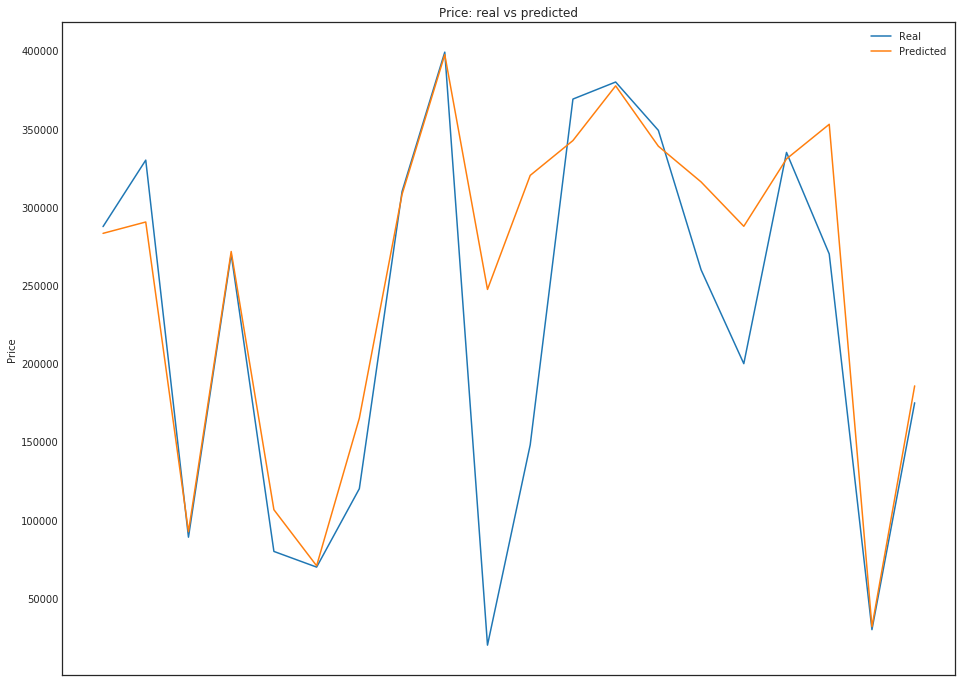

In [37]:
plt.rcParams['figure.figsize'] = 16,12
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("Price")
plt.xticks(())
plt.show()

We can notice clearly that the two line (real vs predicted) fit each other well, with some small differences which let us say that we did a good improvement compared with the first model.

# Final Model

To test the model lets first build a function that takes a simple user input and transform it to a one hot encoding.

In [38]:
user_input = {'Bedroom':4, 'Bathroom':2, 'SqFt':3000, 'City':'Edmonton Area'}

def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(33)
    # set the numerical input as they are
    enc_input[0] = data['SqFt']
    enc_input[1] = data['Bathroom']
    enc_input[2] = data['Bedroom']
    
    cities = df.City.unique()
    
    redefinded_user_input = 'City_'+data['City']
     
    city_column_index = X.columns.tolist().index(redefinded_user_input)
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[mark_column_index] = 1
    
    return enc_input

In [39]:
print(input_to_one_hot(user_input))

[3.e+03 2.e+00 4.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00]


In [40]:
a = input_to_one_hot(user_input)

In [41]:
finalPrice = gbr.predict([a])

In [42]:
print("the best price for this specifications is $", finalPrice)

the best price for this specifications is $ [321457.60378348]


# Conclusion

The model is fully functional but results is not accurate. There are some issues that creates inaccuracy in result. Issues include:

1- The model collects infromation from kijiji properly, but due to inconsistancy in ads information it made it difficult for the model to process the information. Manual filteration was required to run the model. To fix this issue the model should scrape a more accurate website that is specialized for real estates. This would provide more variables to model with, therefore accuracy would be improved drastically. another solution to this problem is programming a better filteration process

2- When collecting ads details, dublicates were not deleted. dublicates reduced the accuracy of the model as the same information was saved multiple times. To solve this issue a function would be programmed to delete duplicates.

3- Information is not accurate as only 200 samples were used. This is due to the above issues causing the function that scrapes the website very slow. We couldn't figure out why scraping took a very long time to get completed

using the data that was collected we were able to produce accurate enough results proving that the concept would work if a different website was used.

In this model, Data was used to train the model on predicting the price of a specific requirement of a real estate property. This model was
based on a gradient boosting model. The model recorded a
variance and RMSE of .80 and 34551.17 after analyzing 200 Ads.
The model’s accuracy increases over time as proven in the result section.

Most of the challenges we faced in this project were mostly technical as this was the first time both team members work with python


# References

[1] Jerome H.Friedman (1999). A gradient boosting Machine. Gradient Function
Approximation, 10(3), 1–50.

[2] Olaf Gefeller (2017). Predictive Modelling Based on Statistical Learning in
Biomedicine. Comput Math Methods Med.

[3] RW Swain, KE Kilpatrick, JJ Marsh 3rd (1977). Implementation of a model for census prediction and control. Health Serv Res, 12(4).

[4]Allen B.Downey Think Complexity: Exploring Complexity Science in Python. Green Tea Press, Needham, Massachusetts, 2016, pp. 141-151.

[5] Joshua M. Epstein and Robert Axtell. Growing Artificial Societies: Social Science from the Bottom Up. The MIT Press, 1996